<a href="https://colab.research.google.com/github/Al-Tayeb96/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

## Project Overview

#Imports

In [101]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Data

In [102]:

path="/content/drive/MyDrive/ CodingDojo/01-Fundamentals/Week02/Data folder/sales_predictions_2023.csv"
df_sales=pd.read_csv(path)



In [103]:
df2_sales=df_sales.copy()

In [104]:
df3_sales=df_sales.copy()

In [105]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [107]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## How many rows and columns?

In [108]:
df_sales.shape

(8523, 12)

There are 8523 rows and 12 columns

##What are the datatypes of each variable?

In [109]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

All  data types are as they should be.



## Clean Data

##Are there duplicates? If so, drop any duplicates.

In [110]:
duplicates_rows_all=df_sales.duplicated().sum()
duplicates_rows_all

0

##This datafram don't have any duplicates.

##Identify missing values.

In [111]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [112]:
round(df_sales.isna().sum()/len(df_sales)*100,2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

Missing Values:

There are 1463 missing values in the Item_Weight  column. (17.17%)


There are 2410 missing values in the Outlet_Size in usd column. (28.28%)

##Address the missing values by using a placeholder value.

In [113]:
df_sales['Item_Weight'].dtypes

dtype('float64')

In [114]:
medn_value=df_sales['Item_Weight'].median()

In [115]:
df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(medn_value)


check the data type of Item_Weight
and deal with the missing values, we could fill them in with the  -1 for this feature.

In [116]:
df_sales['Outlet_Size'].dtypes

dtype('O')

In [117]:
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna("MISSING")

check the data type of Outlet_Size
and deal with the missing values, we could fill them in with the word MISSING for this feature.

##Confirm that there are no missing values after addressing them.

In [118]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

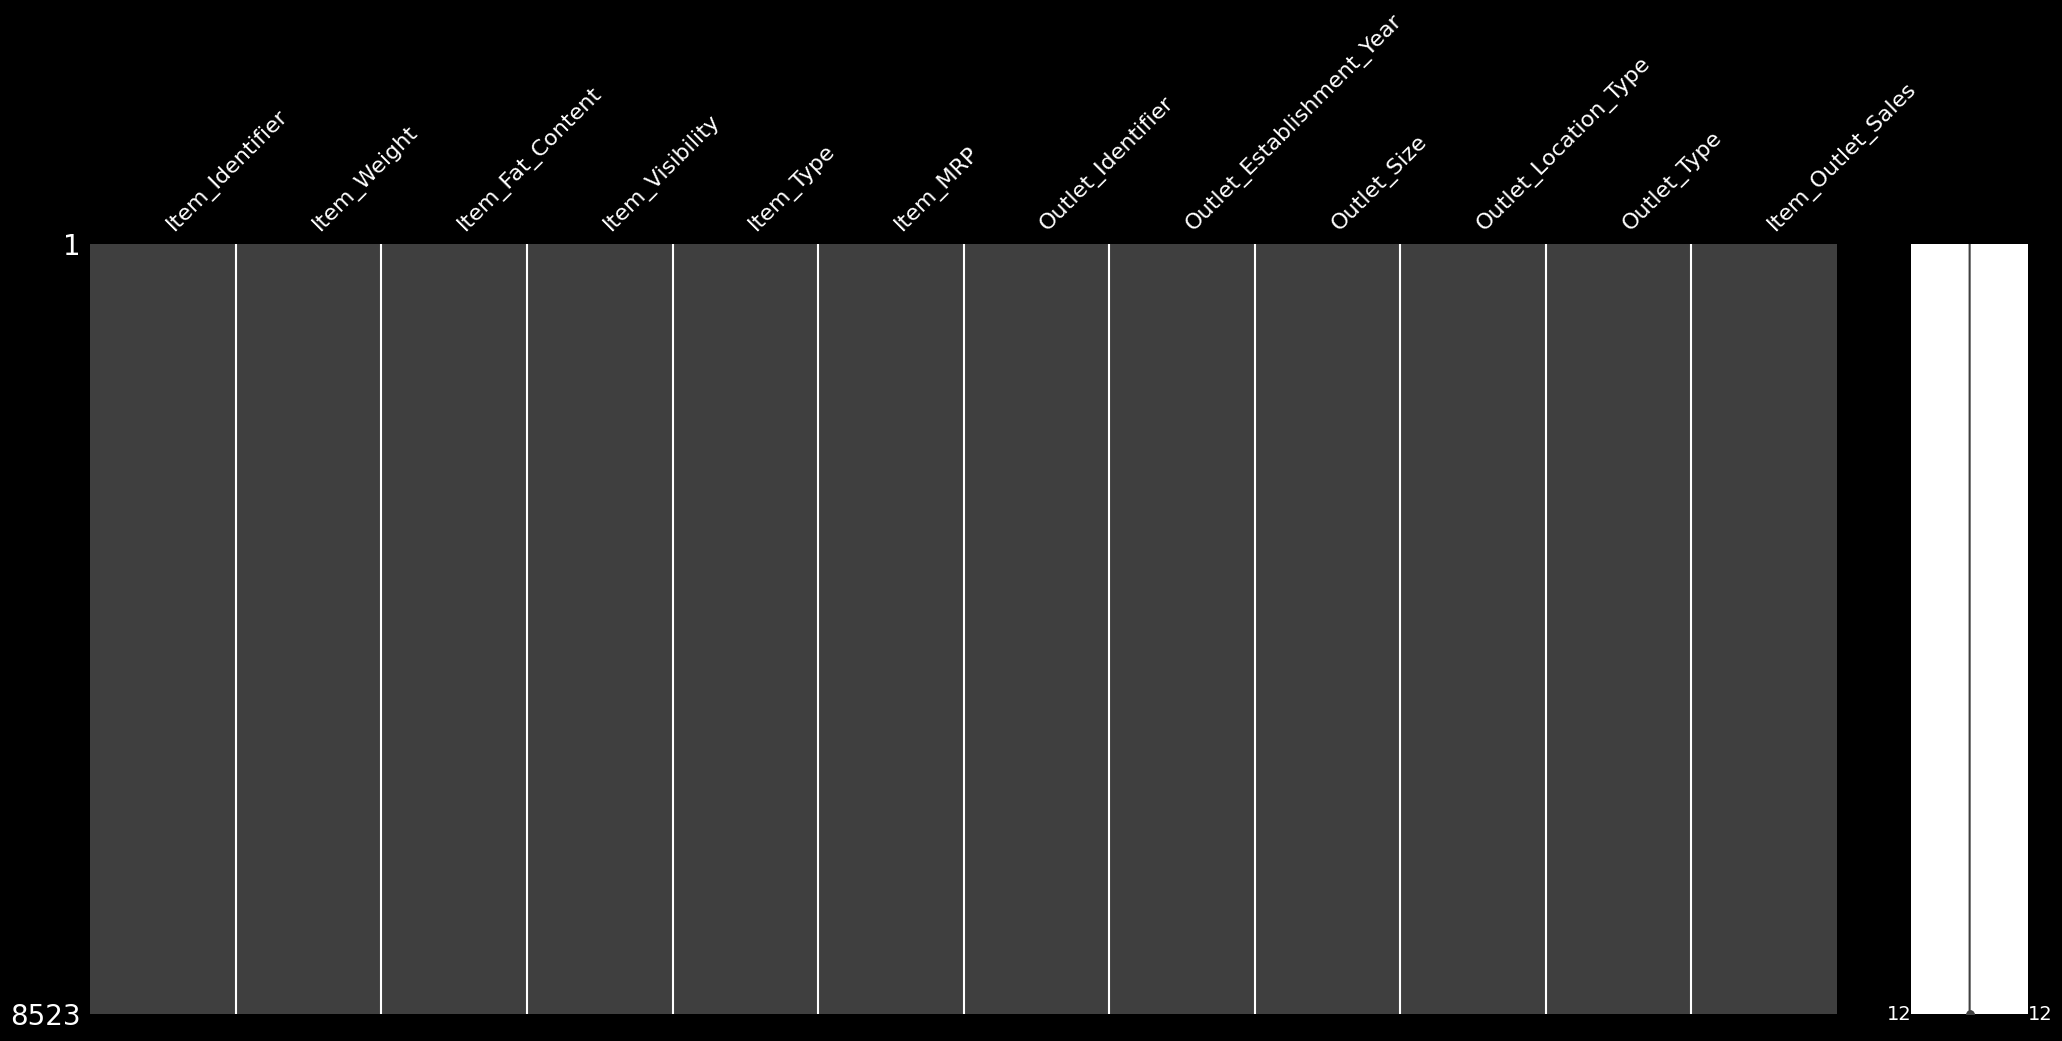

In [119]:
msno.matrix(df_sales)

## Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [120]:
for cols in df_sales:
  print(f"value of {cols} contins ")
  print(df_sales[cols].value_counts())
  print("\n\n")

value of Item_Identifier contins 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



value of Item_Weight contins 
12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64



value of Item_Fat_Content contins 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



value of Item_Visibility contins 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



value of Item_Type contins 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Fr

In [121]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the Item_Fat_Content column:

LF and low fat should be Low Fat


reg should be Regular


In [122]:
dict_fat={"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}

In [123]:
for cols in dict_fat:
  df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace(dict_fat)

In [124]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [125]:
numric_df=df_sales.describe().round(2)
numric_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [126]:
req_num=["min","max","mean"]
numric_df.loc[req_num]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.81,0.07,140.99,1997.83,2181.29


## Exploratory Data Analysis

In [127]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background'])

#Histograms to view the distributions of numerical features in your dataset.

In [128]:
num_cols=df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

[Text(0.5, 1.0, 'the distributions of numerical features')]

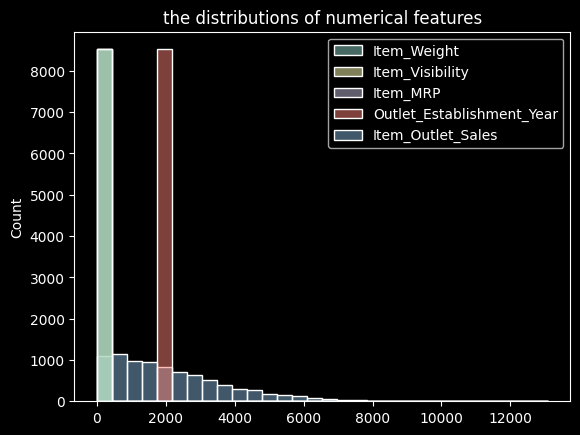

In [129]:
ax=sns.histplot(df_sales,bins=30)
ax.set(title='the distributions of numerical features')


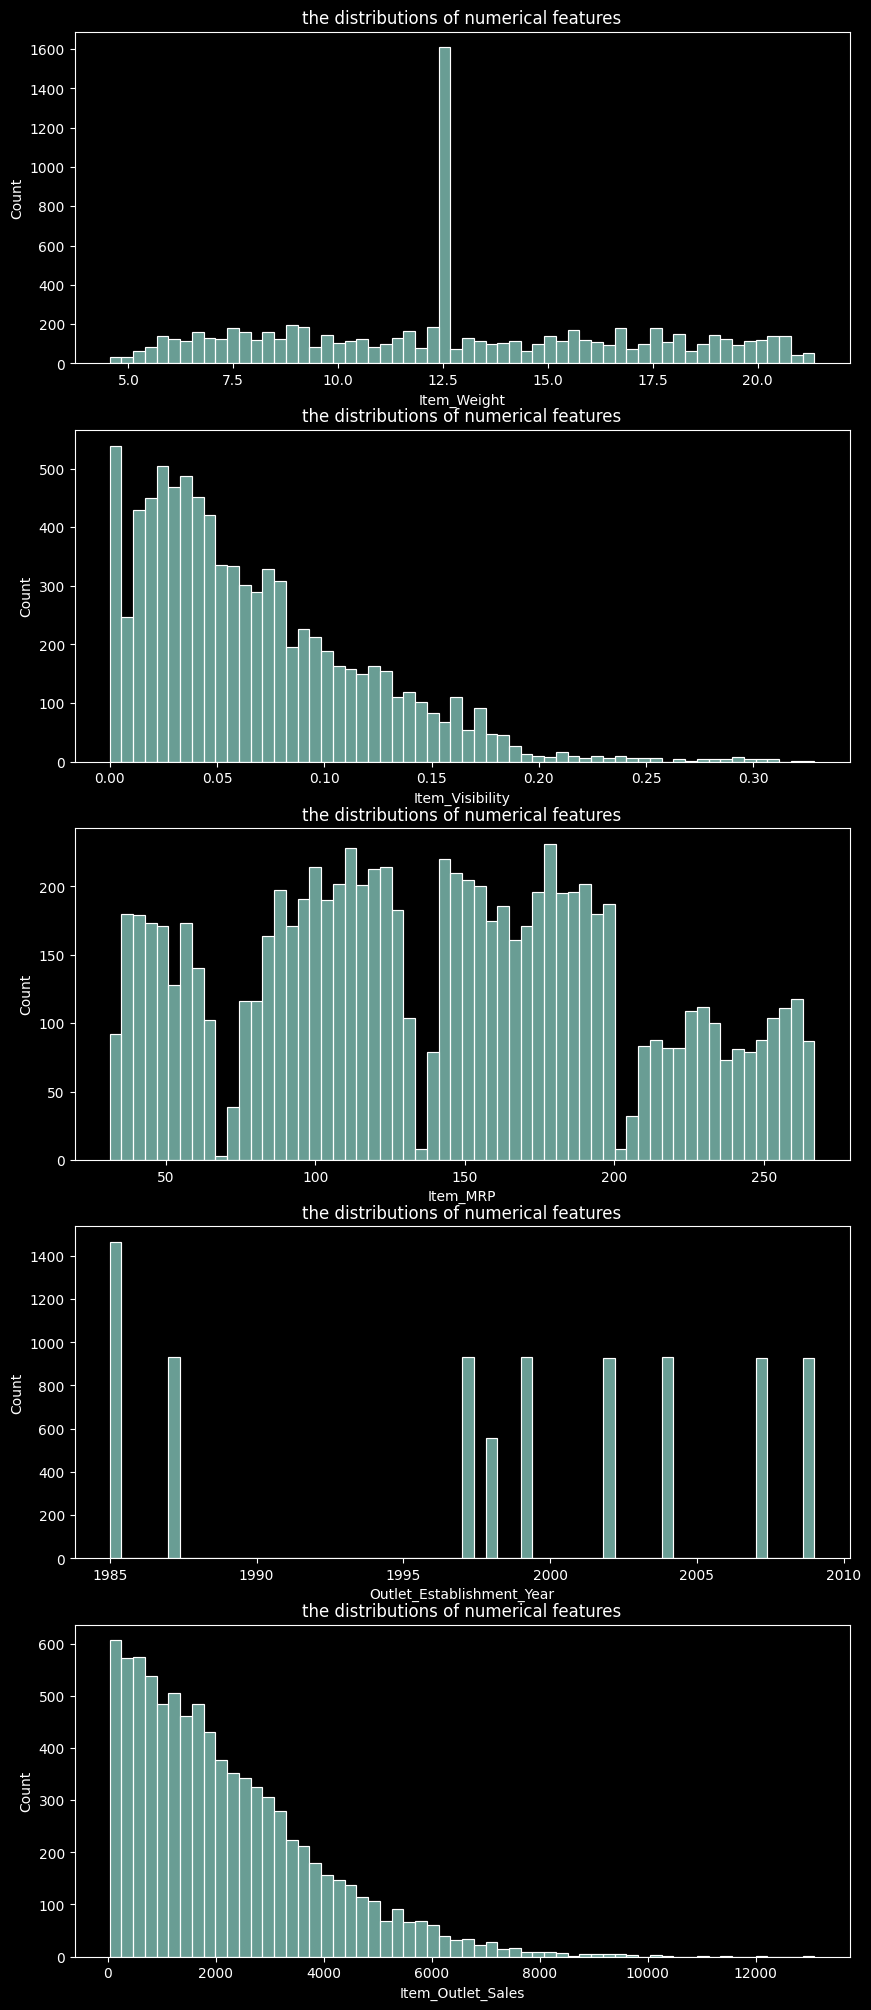

In [130]:
i=0
fig,axes=plt.subplots(len(num_cols),figsize=(10,25))
for cols in num_cols:
   ax=sns.histplot(df_sales,x=cols,bins=60,ax=axes[i])

   ax.set(xlabel=f"{cols}",title="the distributions of numerical features")
   i=i+1


#Boxplots to view statistical summaries of numerical features in your dataset.

[Text(0.5, 1.0, 'statistical summaries of numerical features')]

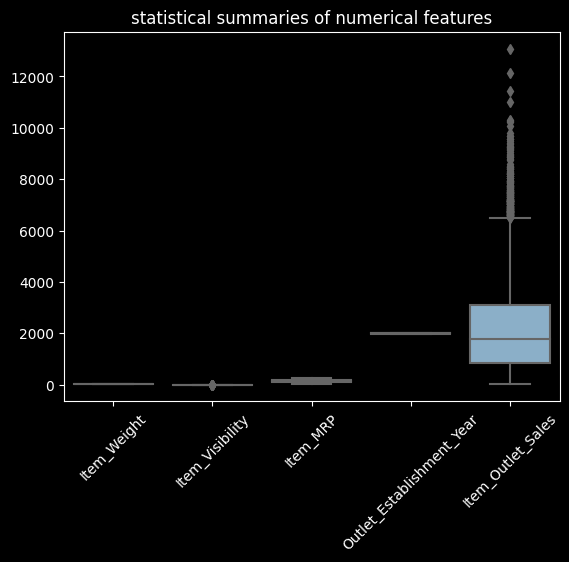

In [131]:
fig,ax=plt.subplots()
ax=sns.boxplot(df_sales)
ax.tick_params(axis='x',rotation=45)
ax.set(title='statistical summaries of numerical features')


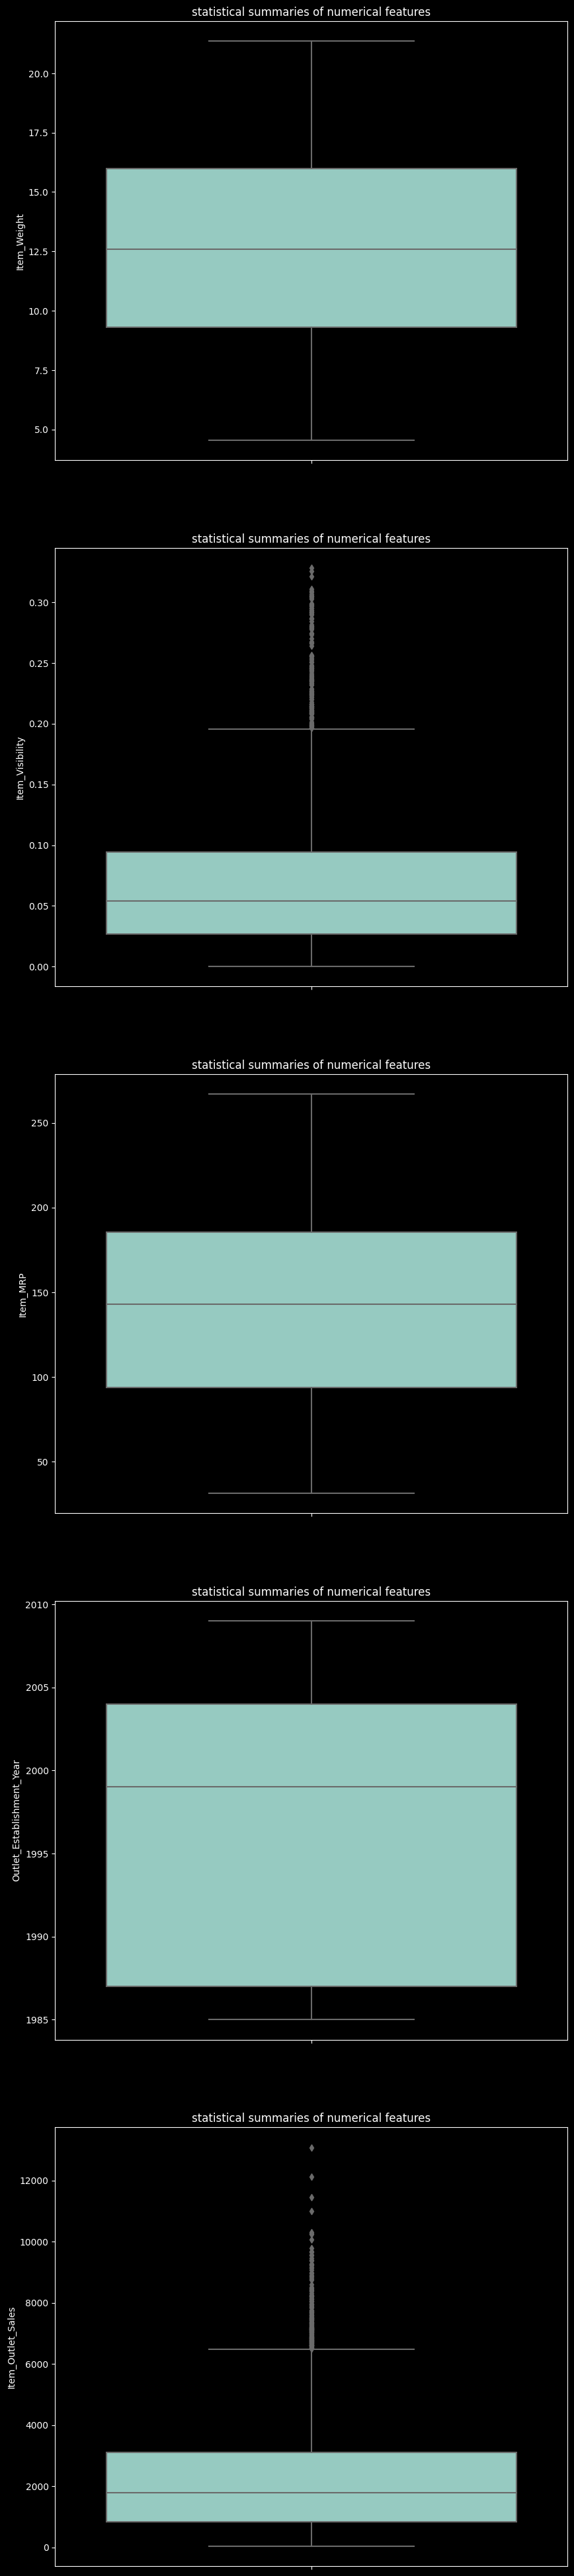

In [132]:
i=0
fig,axes=plt.subplots(len(num_cols),figsize=(10,50))
for cols in num_cols:
   ax=sns.boxplot(df_sales,y=cols,ax=axes[i])

   ax.set(title="statistical summaries of numerical features")
   i=i+1

In [133]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [134]:
df_sales['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

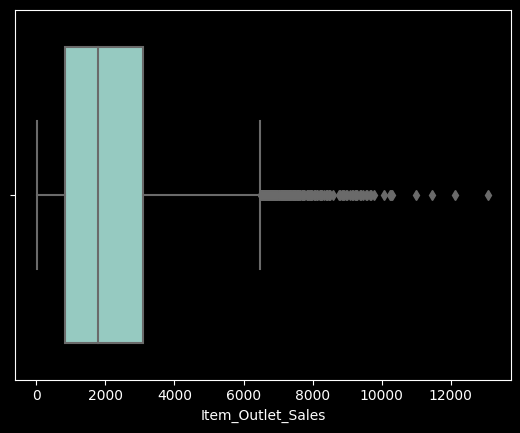

In [135]:
ax=sns.boxplot(df_sales,x="Item_Outlet_Sales")

#Countplots to view the frequency of each class of categorial features in your dataset.

In [136]:
cat_cols=df_sales.select_dtypes("object").columns
cat_cols2=cat_cols[1:len(cat_cols)]
cat_cols2

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

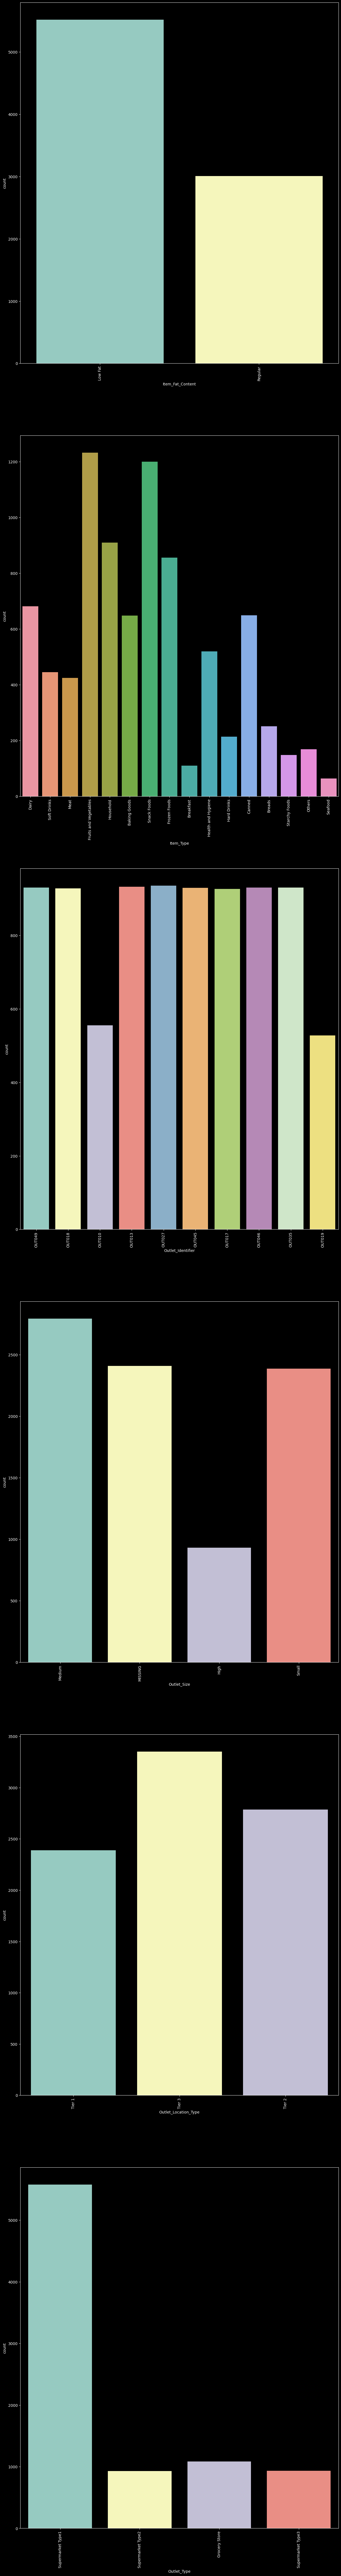

In [137]:
i=0
fig,axes=plt.subplots(len(cat_cols2),figsize=(15,120))
for cols in cat_cols2:
   ax=sns.countplot(df_sales,x=cols,ax=axes[i])

   ax.tick_params(axis='x',rotation=90)
   ax.set(xlabel=f"{cols}")
   i=i+1


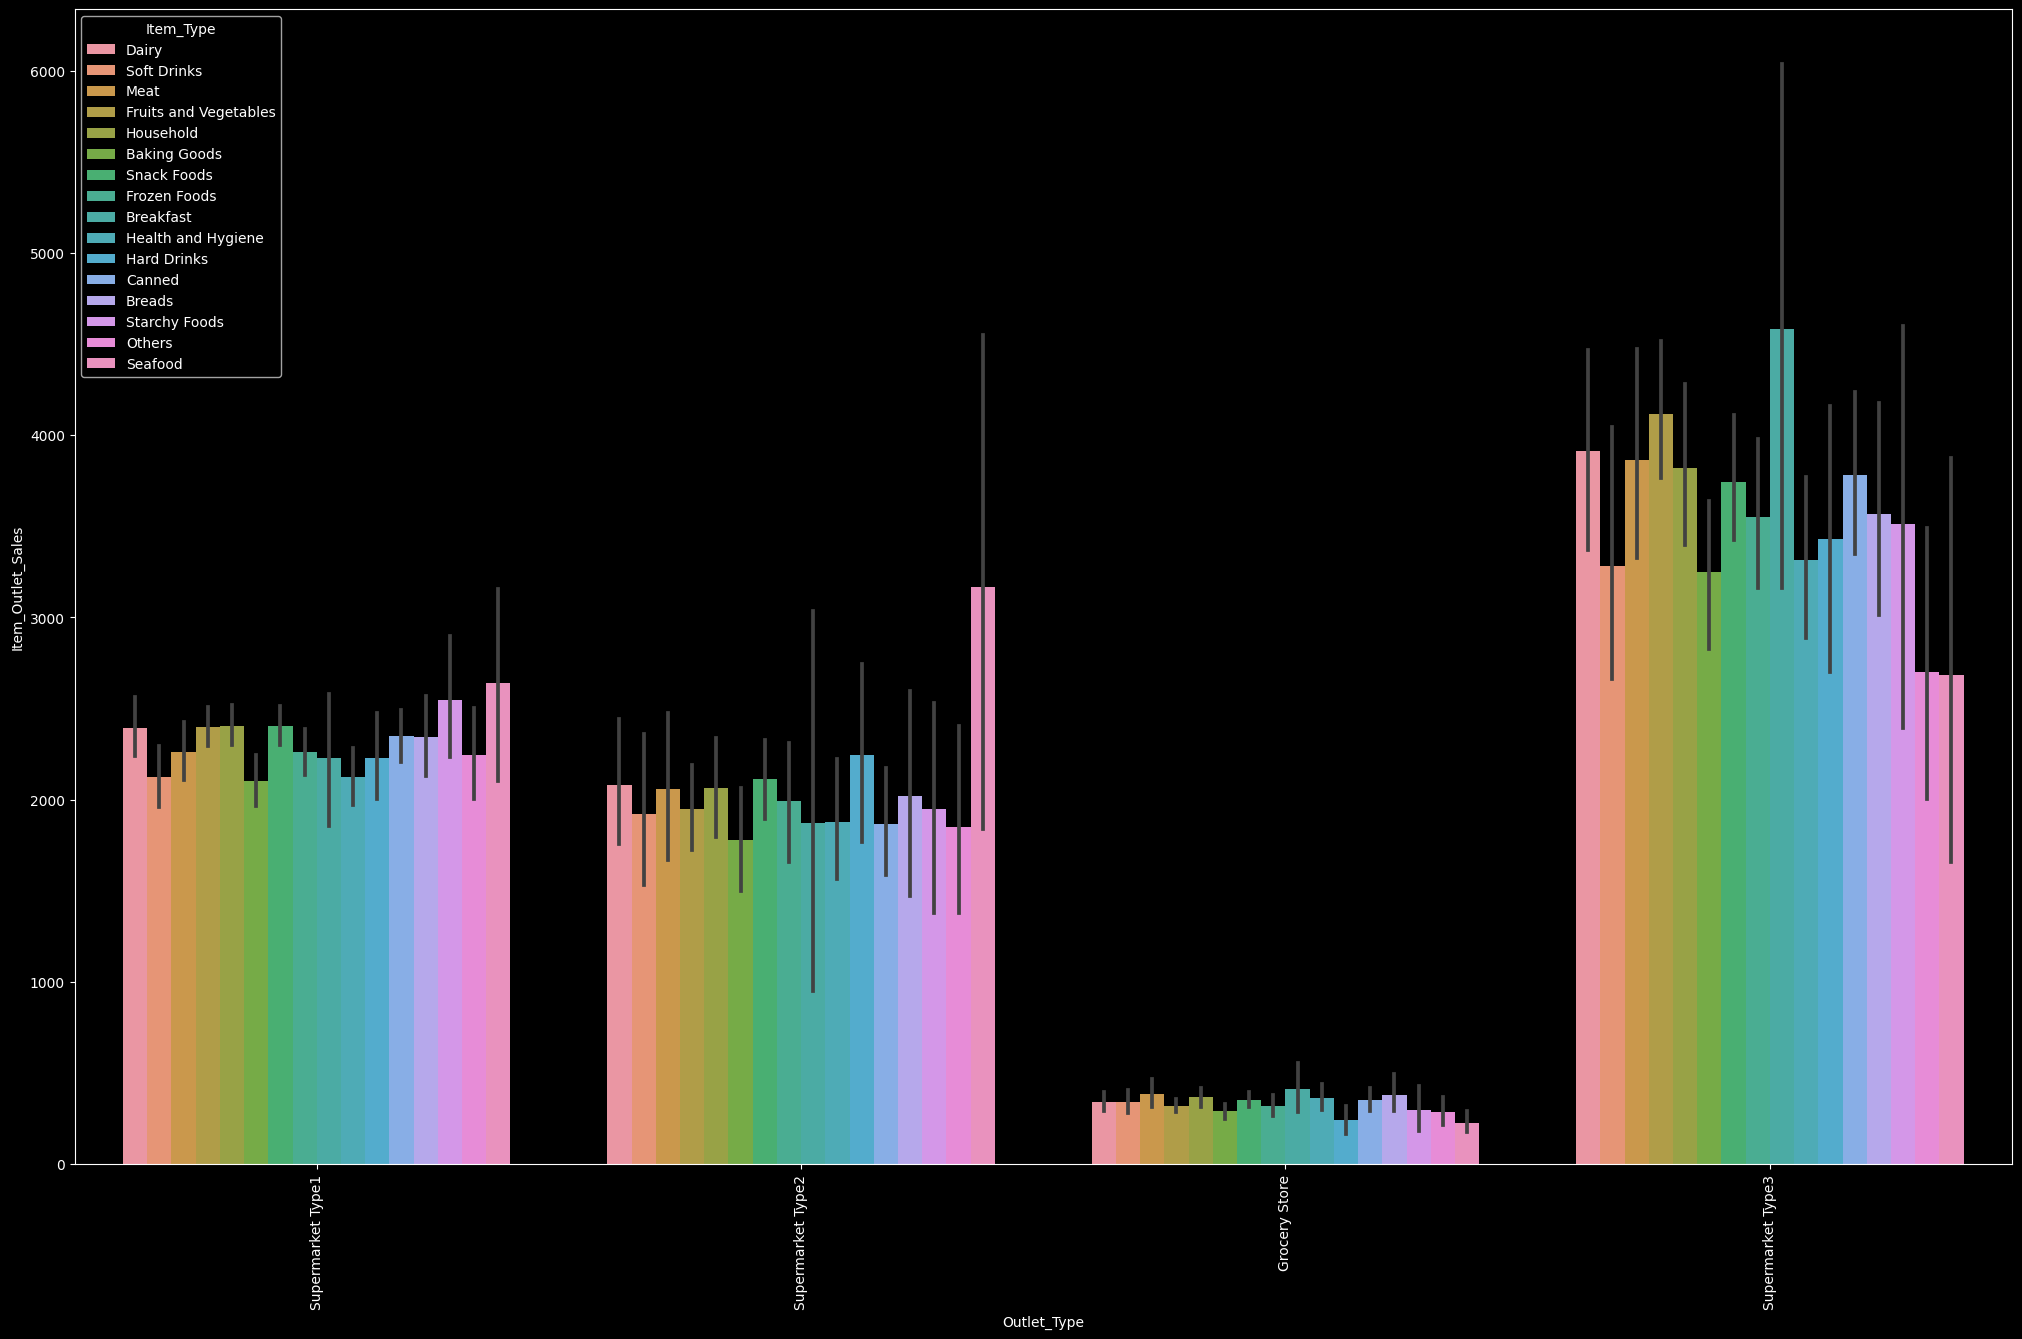

In [138]:
fig,axes=plt.subplots(figsize=(25,15))

ax=sns.barplot(df_sales,x='Outlet_Type',y='Item_Outlet_Sales',hue="Item_Type")
ax.tick_params(axis='x',rotation=90)

#Heatmap to view the correlation between features.

In [139]:
corr=df_sales.corr(numeric_only=True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


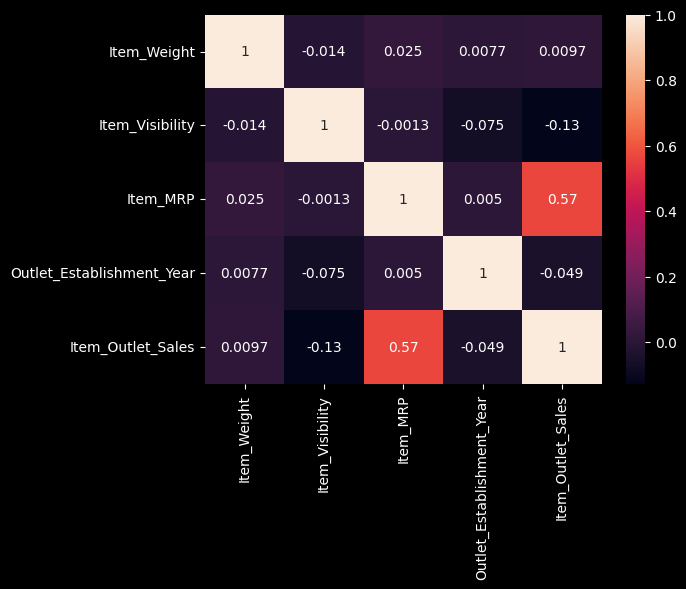

In [140]:
ax=sns.heatmap(corr,annot=True)

## Feature Inspection

In [141]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [142]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  plt.show()

  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  line_kws={'color':'red'}

  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws,line_kws=line_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax














In [143]:

def Feature_Inspection_categorical(df,use_cols,target_value):
  for cols in use_cols:
    if (df[cols].dtypes=='O'):
    # Confirming the dtype to select correct EDA function
      feature = cols
      df[feature].dtype
      # run the appropriate explore function (based on feature's dtype)
      print('\n')
      explore_categorical(df,feature);
      # Run the appropriate feature vs. target function (based on dtype)
      print('\n')
      plot_categorical_vs_target(df, feature,target_value)
      print('\n')
      print('\n')


def Feature_Inspection_numric(df,use_cols,target_value):
  for cols in use_cols:
   if (cols!= target_value):
    if (df[cols].dtypes=='int' or df[cols].dtypes=='float'):

       # Confirming the dtype to select correct EDA function
       feature = cols
       df[feature].dtype
       print('\n')
       # run the appropriate explore function (based on feature's dtype)
       explore_numeric(df,feature);
       print('\n')

       # Run the appropriate feature vs. target function (based on dtype)
       plot_numeric_vs_target(df,feature, target_value);
       print('\n')
       print('\n')




In [144]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [145]:
df_sales[cat_cols]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [146]:
df2_sales[num_cols]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [147]:
# Keep ony required columns
use_cols=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
df_sales=df_sales[use_cols]
df_sales

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999,3735.1380,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009,443.4228,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,17.500,0.016760,141.6180,1999,2097.2700,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,19.200,0.000000,182.0950,1998,732.3800,Regular,Fruits and Vegetables,MISSING,Tier 3,Grocery Store
4,8.930,0.000000,53.8614,1987,994.7052,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,8.380,0.046982,108.1570,2002,549.2850,Regular,Baking Goods,MISSING,Tier 2,Supermarket Type1
8520,10.600,0.035186,85.1224,2004,1193.1136,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009,1845.5976,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


- Defineing the  target column:
  - Item_Outlet_Sales

#Part One: nomnal columns

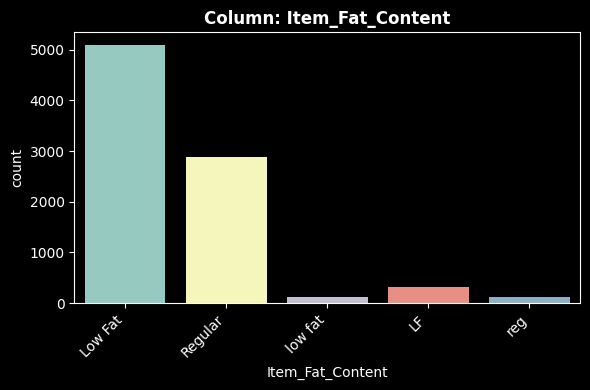

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.




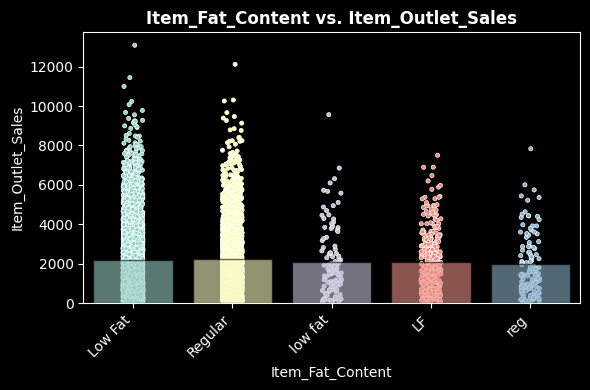

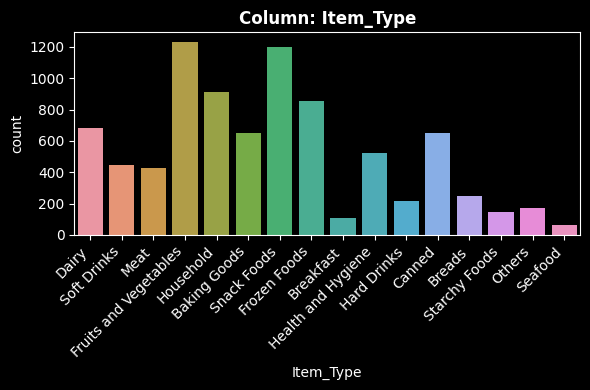

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.




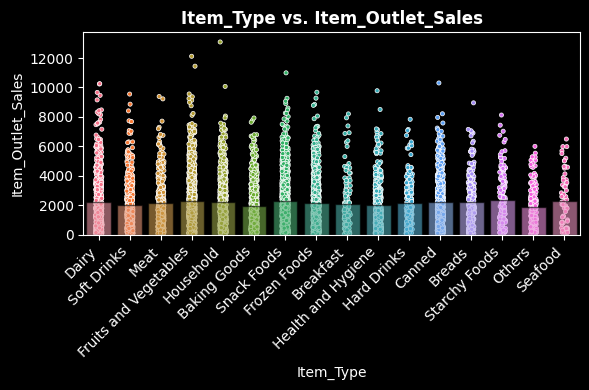

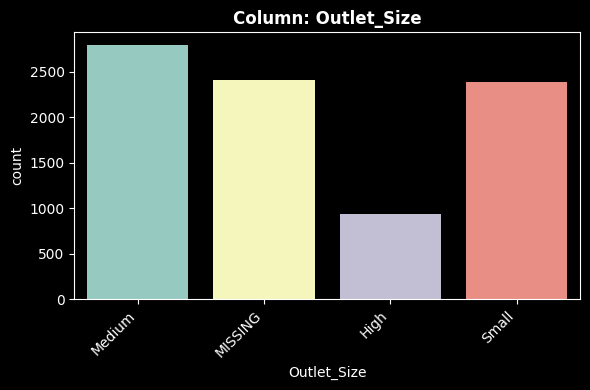

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.




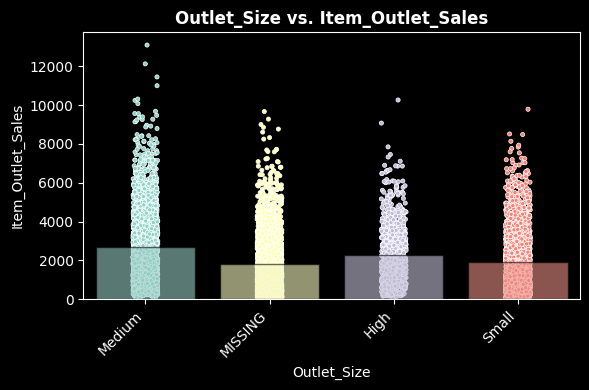

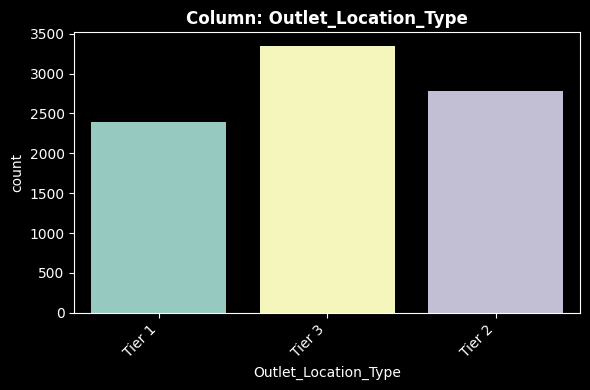

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.




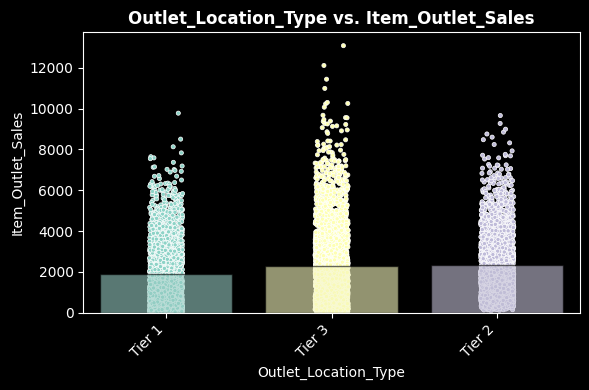

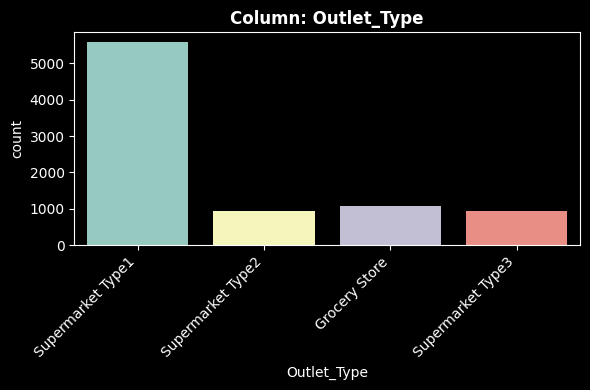

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.




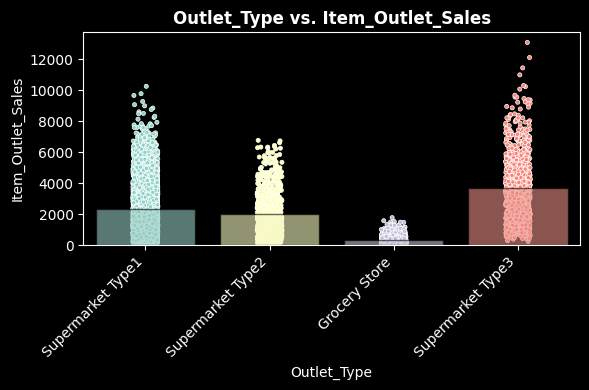

In [148]:
Feature_Inspection_categorical(df2_sales,use_cols,'Item_Outlet_Sales')

##Item_Fat_Content
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.




**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________
##Item_Type


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 null values
  -  high cardinality ( < 10)

5. Would we know this BEFORE the target is determined?
  - NO.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.




**Feature vs. Target Observations:**



  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

  `Yes it does, there is variability between the groups, even though some have similar means.`



________________________________________________________________________________
##Outlet_Size
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 uniqe values
  -  high cardinality ( not > 10)

5. Would we know this BEFORE the target is determined?
  - NO.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________
##Outlet_Location_Type
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________
##Outlet_Type
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

**Feature vs. Target Observations:**


  - Based on your business understanding, would you expect this feature to be a predictor of the target?

      `Yes.`
  - Does this feature appear to be a predictor of the target?

     `Yes it does, there is variability between the groups, even though some have similar means.`

________________________________________________________________________________

#Part Two : numric columns

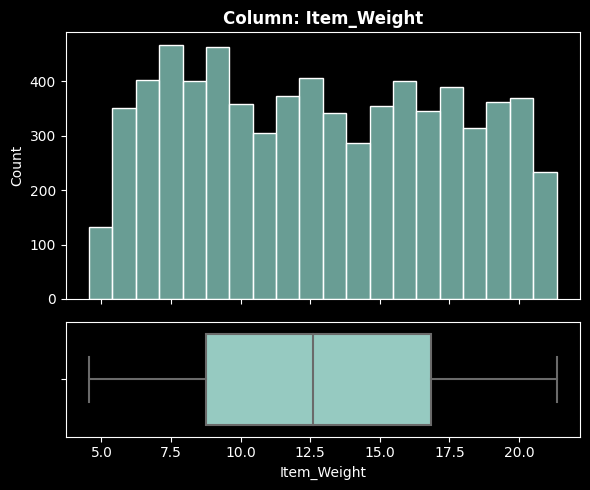

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.




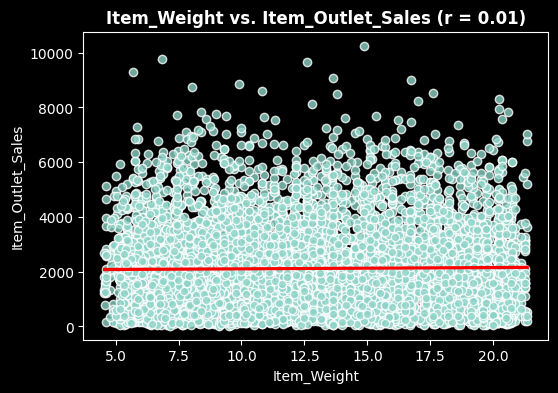

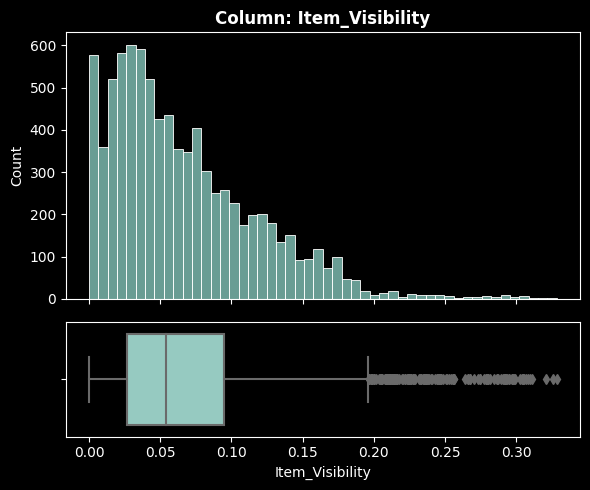

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.




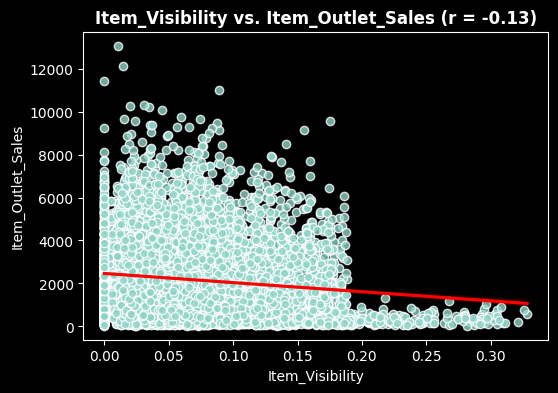

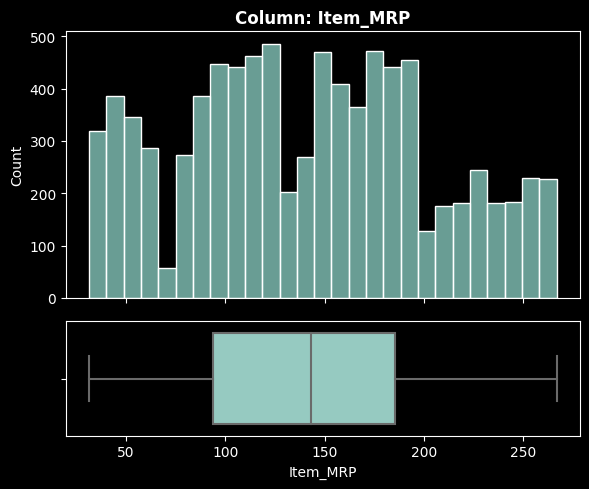

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.




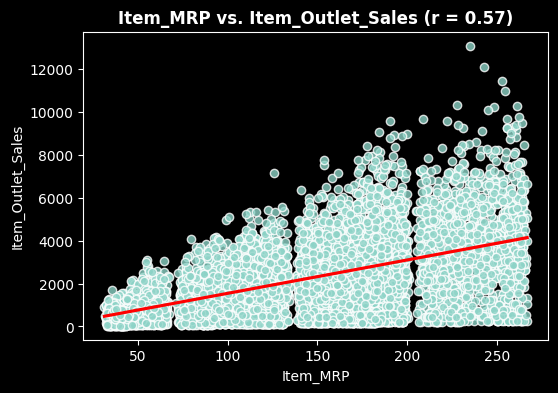

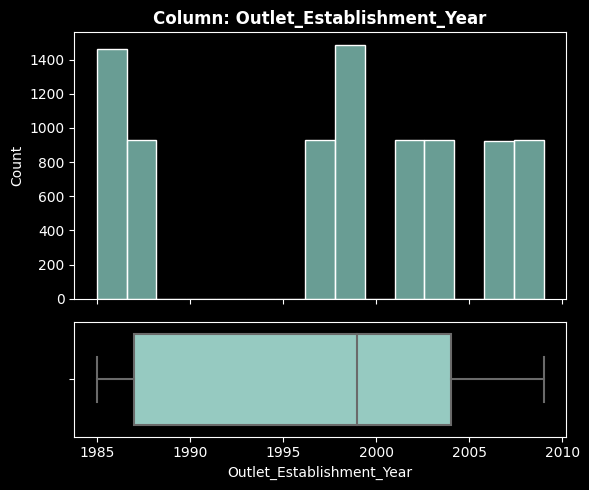

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.




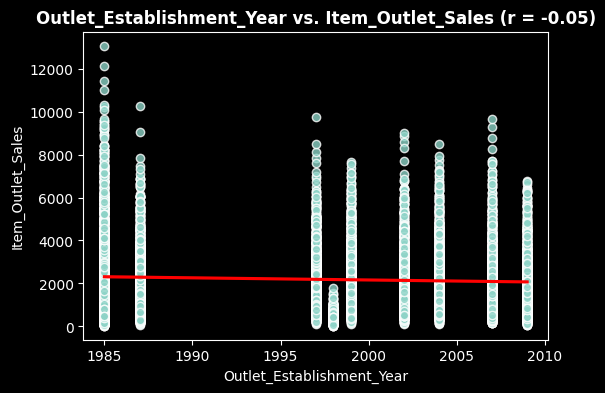

In [149]:
Feature_Inspection_numric(df2_sales,use_cols,'Item_Outlet_Sales')

#Item_Weight
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values (17.17%).
  - imput it by medain value.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - NO,products price does not depend on weight
  - Does this feature appear to be a predictor of the target?
    - NO, trand line give us a constant value

___

________________________________________________________________________________
#Item_Visibility
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values .

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No,prudcts area dosn't effect on sales.
  - Does this feature appear to be a predictor of the target?
    - No

___

#Item_MRP
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes,mpr change form distributor to another
  - Does this feature appear to be a predictor of the target?
    - Yes!

___

#Outlet_Establishment_Year
**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no, there is no effect .
  - Does this feature appear to be a predictor of the target?
    - no, its give us a negative corr!

___

---
#Project 1-Part 5
##Preprocesing for Machine Learning
 in this part we will go back to your original dataset with the goal of preventing data leakage.

 **Goals are :**

* Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.

* Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

**Hint**: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.

* Perform a train test split

* Create a preprocessing object to prepare the dataset for Machine Learning
Make sure your imputation of missing values occurs after the train test split using SimpleImputer.





#Imports

In [150]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

#Reloading in the Data

In [151]:
df3_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Performing Preprocessing Steps

In [152]:
#drop the "Item_Identifier" feature because it has very high cardinality
df3_sales=df3_sales.drop(columns='Item_Identifier')
df3_sales.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
# Checking for Duplicates
df3_sales.duplicated().sum()

0

In [154]:
# Checking missing values
df3_sales.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [155]:
# replacing inconsistent categories in job_title column
# then checking to make sure the change took place
dict_fat2={"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}
for cols in dict_fat2:
  df3_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace(dict_fat2)


df3_sales['Item_Fat_Content'].value_counts()




Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [156]:

df3_sales['Item_Fat_Content']=df3_sales['Item_Fat_Content'].replace('Low Fat','LowFat')
df3_sales['Item_Fat_Content'].value_counts()


LowFat     5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#Dropping Unwanted Columns



- drop any cols that didn't affect on target value

In [157]:
unuesd_cols=['Item_Visibility','Outlet_Identifier','Outlet_Establishment_Year']
df3_sales=df3_sales.drop(columns=unuesd_cols)
df3_sales.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,LowFat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,LowFat,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,LowFat,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


#Defining X and y

In [158]:
#Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and
# the rest of the relevant variables as your features matrix.
y=df3_sales['Item_Outlet_Sales']
X=df3_sales.drop(columns='Item_Outlet_Sales')
X.head()



,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,LowFat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.50,LowFat,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store
4,8.93,LowFat,Household,53.8614,High,Tier 3,Supermarket Type1


In [159]:
#make a copy
y2=y.copy()
X2=X.copy()

#Train-Test-Split

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

#Making a Preprocessing Pipeline

Split a train data basd on featuers types (Nomnail,ordinal,numrical)


In [161]:
#for numric featuares
num_cols=X_train.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_MRP'], dtype='object')

In [162]:
#make pipeline for numric cols
impute_median=SimpleImputer(strategy='median')
num_scale=StandardScaler()
num_pip=make_pipeline(impute_median,num_scale)
num_pip



Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [163]:
#make tuple for numric cols
num_tuple=("Numric",num_pip,num_cols)

In [164]:
# for ordinal featuers
ord_cols=['Item_Fat_Content','Outlet_Size']
X_train[ord_cols].isna().sum()

Item_Fat_Content       0
Outlet_Size         1812
dtype: int64

In [165]:
#make a pipeline for ord feateurs
impute_ord=SimpleImputer(strategy='most_frequent')
ord_cond1=['LowFat','Regular']
ord_cond2=['Medium','Small','High']
ord_encode=OrdinalEncoder(categories=[ord_cond1,ord_cond2])
ord_scale=StandardScaler()

ord_pip=make_pipeline(impute_ord,ord_encode,ord_scale)
ord_pip




Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['LowFat', 'Regular'],
                                            ['Medium', 'Small', 'High']])),
                ('standardscaler', StandardScaler())])

In [166]:
#make a tuple for ord featuers
ord_tuple=('ordinal',ord_pip,ord_cols)

In [167]:
#for Nominal featears
cat_cols=X_train.select_dtypes('object').drop(columns=ord_cols).columns
cat_cols

Index(['Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')

In [168]:
#make a pipeline for Nominal featers
impute_na=SimpleImputer(strategy='constant',fill_value='Na')
one_encode=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
cat_pip=make_pipeline(impute_na,one_encode)
cat_pip


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Na', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [169]:
#make tuple for Nominal featers
cat_tuple=('Nominal',cat_pip,cat_cols)

In [170]:
tf_cols=ColumnTransformer([num_tuple,ord_tuple,cat_tuple],remainder='passthrough',
                                    verbose_feature_names_out=False)
tf_cols

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('Nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Na',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [171]:
tf_cols.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('Nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Na',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [172]:
X_train_processed=tf_cols.transform(X_train)
X_test_processed=tf_cols.transform(X_test)
X_train_processed.head()


,Item_Weight,Item_MRP,Item_Fat_Content,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,1.828109,-0.740321,-0.725916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,0.603369,1.350766,-0.725916,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,0.244541,1.350766,-0.725916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-0.952591,-0.740321,0.739673,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.336460,-0.740321,-0.725916,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [173]:
#confirm MISSING VALUES
X_train_processed.isna().sum().sum()

0

In [174]:
X_test_processed.isna().sum().sum()

0

#Project 1 - Part 6

1. Your first task is to build a linear regression model to predict sales.

- Build a linear regression model.
- Use the custom evaluation function to get the metrics for your model (on training and test data).
- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
2. Your second task is to build a Random Forest model to predict sales.

- Build a default Random Forest model.
- Use the custom evaluation function to get the metrics for your model (on training and test data).
- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- Compare this model's performance to the linear regression model: which model has the best test scores?
3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.

- After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).
- Compare your tuned model to your default Random Forest: did the performance improve?

4. You now have tried several different models on your data set. You need to determine which model to implement.

- Overall, which model do you recommend?

- Justify your recommendation.

- > In a Markdown cell:
  - Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
  - Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
  - Include why you selected this metric to explain to your stakeholder.
  - Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

#Maching Learning - Training the Models

###Linear Regression Model

In [175]:
#Imports for LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [176]:
# Add custom functions (from snippets if you have saved it)

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [177]:
#creat a LinearRegression model
leg_model=LinearRegression()
leg_model.fit(X_train_processed,y_train)
evaluate_regression(leg_model,X_train_processed,y_train,X_test_processed,y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.395
- MSE = 1,300,770.158
- RMSE = 1,140.513
- R^2 = 0.560

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 805.116
- MSE = 1,197,969.401
- RMSE = 1,094.518
- R^2 = 0.566


### Evaluate model's performance  before prediction




**Overall, the model's performance on both the training and test data is fairly consistent. The model has some predictive power as indicated by the R-squared values, but there is room for improvement in reducing the prediction errors (MAE, MSE, RMSE).**

to what extent is this model overfit/underfit?

- The model shows a relatively consistent performance between the training and test data in terms of R^2. It is neither significantly overfit nor underfit in terms of the R^2 metric.

- The MAE, MSE, and RMSE values are high for both training and test data, indicating that the model's predictions have substantial errors. The test data performance is slightly better, but the overall prediction errors are still significant.

the model is not severely overfit to the training data, but it doesn't perform well on either dataset. The model suffers from high prediction errors, and its ability to explain the variance in the target variable is limited. Further model refinement may be needed to improve its performance.

---

##Random Forest model

In [178]:
#Imports for Random Forest model
from sklearn.ensemble import RandomForestRegressor

In [179]:
#crate defult Random Forest model
def_rf=RandomForestRegressor(random_state=42)
def_rf.fit(X_train_processed,y_train)
evaluate_regression(def_rf,X_train_processed,y_train,X_test_processed,y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 302.899
- MSE = 193,578.436
- RMSE = 439.975
- R^2 = 0.935

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 795.514
- MSE = 1,311,943.814
- RMSE = 1,145.401
- R^2 = 0.524


### Evaluate model's performance  before prediction


the provided regression metrics strongly indicate that the model is overfitting the training data. It performs exceptionally well on the training data but generalizes poorly to the test data, as evidenced by significantly higher errors and a lower R^2 value on the test data. Further model regularization or parameter tuning is needed to improve its generalization performance.

to what extent is this model overfit/underfit?

- the model is significantly overfitting the data. It performs exceptionally well on the training data, achieving a high R-squared and low errors. However, when tested on unseen data, its performance degrades significantly, leading to a substantial drop in R-squared and a significant increase in prediction errors (MAE, MSE, and RMSE). The model fails to generalize,

which model has the best test scores?
- **Linear Regression** has the best test scores, indicating that it performs better in terms of predictive accuracy on unseen data.

## Improving Model

In [180]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [181]:
# see available paramters
def_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [182]:
#tune at least two hyperparameters for a Random Forest model
params = {
 'max_depth': [3,5,10,20],
 'n_estimators': [200,400,450,500,550]
 }

# Instaniate the gridsearch
gridsearch_rf = GridSearchCV(def_rf, params, n_jobs=-1, verbose=1)
# Fit the gridsearch on the training data
gridsearch_rf.fit(X_train_processed, y_train)
# Obtain the best paramters from the gridsearch
gridsearch_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 5, 'n_estimators': 500}

In [183]:
# Define the best version of the model already refitted on entire training set
best_model_rf = gridsearch_rf.best_estimator_

In [184]:
# Use custom function to evalute the model
evaluate_regression( best_model_rf, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 755.607
- MSE = 1,153,716.682
- RMSE = 1,074.112
- R^2 = 0.610

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 728.593
- MSE = 1,096,529.829
- RMSE = 1,047.153
- R^2 = 0.603


##Tuned Random Forest Model Observations

he model's performance is moderately satisfactory, but there is room for improvement, particularly in reducing the prediction errors (MAE, MSE, and RMSE). The model explains a reasonable proportion of the variance in house prices but might benefit from additional features or more advanced modeling techniques to achieve higher accuracy. Additionally, the model's generalization to new data is reasonable, as evidenced by the similar performance on the test data compared to the training data.

Compare your tuned model to your default Random Forest: did the performance improve?

- Mean Absolute Error (MAE): Random Forest Model  has a significantly lower MAE on the training data, indicating that it makes more accurate predictions on the training set. However, on the test data, defult Model has a slightly lower MAE.

- Mean Squared Error (MSE): Random Forest Model  has a substantially lower MSE on the training data, indicating that it reduces the squared errors compared to defult Model . On the test data, defult Model  has a lower MSE.

- Root Mean Squared Error (RMSE): Random Forest Model  has a significantly lower RMSE on the training data, implying that it provides predictions closer to the actual values. However, on the test data, defult Model  has a slightly lower RMSE.

- R^2 (Coefficient of Determination):Random Forest Model  has a higher R^2 on both the training and test data, indicating that it explains a larger proportion of the variance in the data compared to defult Model .

In summary, Random Forest Model  demonstrates improved performance on the training data, with significantly lower MAE, MSE, and RMSE, as well as a higher R^2. However, on the test data, defult Model  has a slightly lower MAE, MSE, and RMSE. Random Forest Model performs better on the test data in terms of R^2.

The choice between the two models depends on the specific requirements and priorities. If you prioritize training data performance and model accuracy,Random Forest Model  is better. If you prioritize generalization and performance on unseen data, defult Model  might be preferred.  Random Forest Model 2has shown improvements in both training and test data performance metrics, indicating better overall model quality.

#Overall Recommendation

Model Performance

Overall, the best model is definitely the tuned Random Forest Regressor Model. There was still some bias in the model, but by far it outperformed the linear regression model.